
---
---

<center><h1>BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding</h1></center>

---
---

#### **OBJECTIVE**

The primary objective of the **BERT** paper, titled **"BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding"**, is to introduce a new language representation model that improves natural language understanding by pretraining on large amounts of text data and fine-tuning on specific downstream tasks.

Key objectives of the paper are:

1. **Pretrain a Deep Bidirectional Model**:
BERT is trained in a **bidirectional** way, meaning it considers both the left and right contexts of a word in every layer. This is different from previous models (e.g., GPT or ELMo), which were either unidirectional (left-to-right or right-to-left) or shallowly bidirectional. This bidirectional approach allows BERT to better capture context and meaning.
2. **Masked Language Model (MLM)**:
One of the primary pretraining tasks in BERT is the **masked language model**. During pretraining, random words in the input sentence are "masked" (hidden), and BERT is tasked with predicting the masked words. This allows the model to learn deep contextual relationships between words.
3. **Next Sentence Prediction (NSP)**:
Another pretraining task BERT uses is **next sentence prediction**, where the model is given two sentences and must predict whether the second sentence naturally follows the first. This helps the model understand sentence relationships and improve tasks like question answering.
4. **Fine-Tuning for Downstream Tasks**:
BERT is designed to be fine-tuned on a variety of specific tasks, such as:
    - **Text classification** (e.g., sentiment analysis in the GLUE benchmark)
    - **Natural language inference** (e.g., MultiNLI)
    - **Question answering** (e.g., SQuAD)
    
    By adding only a small additional layer for each task, BERT can achieve state-of-the-art performance on many NLP tasks with minimal architecture modification.
    

### Summary of the Paper’s Objective:

The objective of the BERT model is to pretrain deep, bidirectional language representations from vast amounts of unlabeled text, which can then be fine-tuned with minimal modifications to excel in various natural language processing tasks like question answering, text classification, and language inference. The goal is to build a single, versatile model that performs well across a wide range of tasks without needing task-specific architectures.

#### **ABSTRACT**

1. BERT, which stands for Bidirectional Encoder Representations from Transformers

2. BERT is designed to pre- train deep bidirectional representations from unlabeled text by jointly conditioning on both left and right context in all layers

3. BERT (Bidirectional Encoder Representations from Transformers) is both easy to understand and highly effective in natural language processing (NLP) tasks.
    It works by understanding the context of words in a sentence more accurately than previous models, which allows it to perform better on various tasks that involve language understanding.

    Here’s a breakdown of its improvements:

    GLUE (General Language Understanding Evaluation): This is a set of tests that measure how well a model can understand language. BERT improved the overall GLUE score by 7.7%, raising it to 80.5%. This is a significant leap, showing BERT’s ability to handle multiple language tasks.

    MultiNLI (Multi-Genre Natural Language Inference): This task tests whether the model can figure out the relationship between two sentences (like whether one implies the other). BERT increased the accuracy here by 4.6%, reaching 86.7%, meaning it’s better at understanding sentence relationships.

    SQuAD v1.1 (Stanford Question Answering Dataset): This is a test where the model answers questions based on a given text. BERT improved its F1 score (which measures accuracy) to 93.2, a 1.5% increase. This shows how well BERT can find exact answers in text.

    SQuAD v2.0: This version of SQuAD includes questions where no answer is provided in the text, making it harder. BERT’s F1 score went up by 5.1%, reaching 83.1, showing its ability to recognize when a question has no answer.

    In simpler terms, BERT makes big improvements in how machines understand and work with language, showing higher accuracy across various types of language tasks.


#### **INTRODUCTION**

---

Language model pre-training helps improve many natural language processing (NLP) tasks.

Here are real-time examples of how pre-trained language models improve natural language processing tasks

---

**Natural Language Inference (NLI):**
Task: The model predicts if one sentence logically follows another (entailment), contradicts it, or is neutral.
Example:

Sentence 1: "A cat is sitting on the couch."
Sentence 2: "An animal is resting on the couch."
Pre-trained models, like BERT, can infer that these sentences have the same meaning (entailment) because it understands that "cat" is a type of "animal."

---
**Paraphrasing:**

Task: The model determines if two sentences mean the same thing.

Example:

Sentence 1: "She enjoys reading books."
Sentence 2: "She likes to read novels."
Pre-trained models can identify that both sentences are paraphrases because "enjoys" and "likes" are similar, and "books" and "novels" are closely related.

---
**Named Entity Recognition (NER):**

Task: The model identifies proper names of people, organizations, locations, etc., in a sentence.

Example:

Sentence: "Elon Musk founded SpaceX in 2002."
Pre-trained models like GPT can recognize "Elon Musk" as a person, "SpaceX" as an organization, and "2002" as a date.

---

**Question Answering:**

Task: The model answers a question based on a given text.

Example:

Text: "The Eiffel Tower is located in Paris."
Question: "Where is the Eiffel Tower?"
Pre-trained models can extract the correct answer, "Paris," by understanding the context of the text and question.


---

These examples highlight how pre-training allows models to grasp language patterns, helping them solve real-world tasks with more accuracy.

---

1. There are two existing strategies for applying pre-trained language representations to downstream tasks: feature-based and fine-tuning.
2. In this paper, we improve the fine-tuning based approaches by proposing BERT: Bidirectional Encoder Representations from Transformers.

---
---

ARCHITECTURE DIAGRAM  - BERT (Bidirectional Encoder Representations from Transformers) model during its pre-training and fine-tuning phases.

---
---

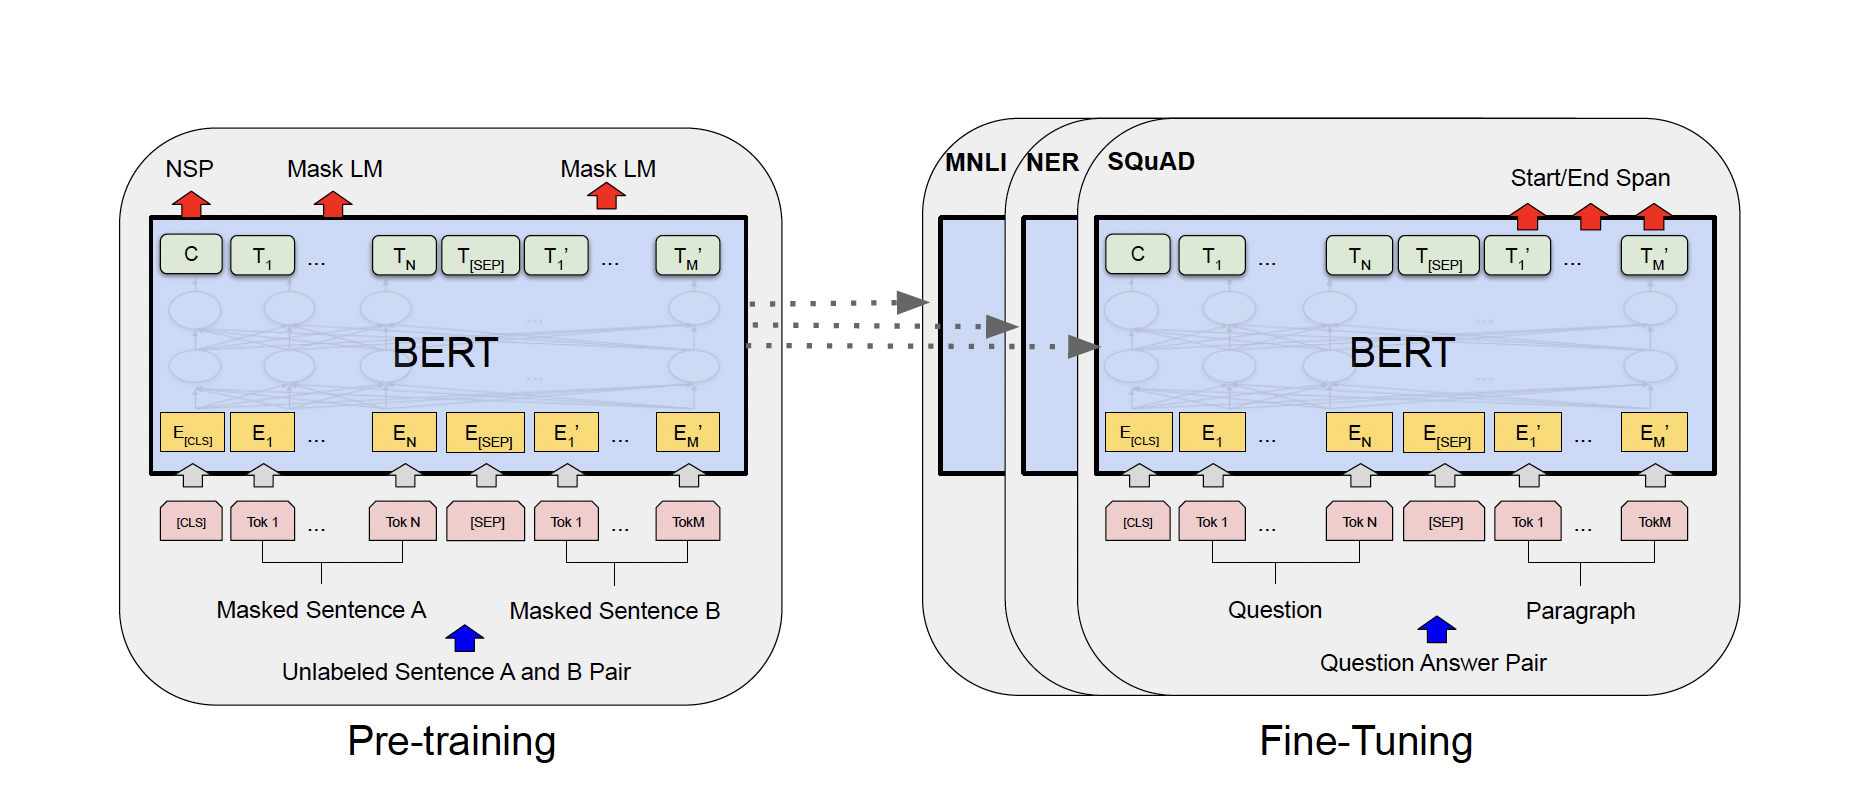

---

EXPLANATION

---


---

### 1. **Input Tokens and Tokenization:**

---

In the **pink blocks**, we represent the **tokenized input** from the clinical notes or medical data in MIMIC-IV. 
Each input text is split into tokens (words or subwords) that BERT can process.

- **Example from MIMIC-IV:**
    - Let's consider two clinical notes:
        - **Sentence A:** "Patient admitted to ICU."
        - **Sentence B:** "Patient received aspirin for chest pain."

BERT first tokenizes these sentences into smaller pieces. The **tokenized input** might look like this:

```css
[CLS], Patient, admitted, to, ICU, [SEP], Patient, received, aspirin, for, chest, pain, [SEP]

```

Here:

- **[CLS]:** This is a special token added at the start. It’s used by BERT for tasks like classification.
- **[SEP]:** This is another special token that separates different parts of the input, like two sentences (Sentence A and Sentence B in the above case).


- **[CLS]:** Marks the start of the input.
- **Other tokens:** Words like "Patient," "aspirin," "chest," etc., are tokenized words from the clinical note.
- **[SEP]:** Separates Sentence A (first clinical note) from Sentence B (second note).



---

### 2. **Embeddings:**

---

The **yellow blocks** represent the **embeddings** that **BERT** creates for each token.
Embeddings are numeric vectors that represent the meaning of each token, as well as additional information like which sentence the token belongs to and its position in the sentence.

For every token, BERT computes an embedding composed of:

1. **Token embedding:** Represents the meaning of the word.
2. **Segment embedding:** Specifies whether the word is from Sentence A or Sentence B.
3. **Position embedding:** Indicates the word's position in the sentence, helping BERT understand the order of words.
- **Example in MIMIC-IV:**
    - Let’s say our tokenized input is:
        
        ```css
        [CLS], Patient, admitted, to, ICU, [SEP], Patient, received, aspirin, for, chest, pain, [SEP]
        
        ```
        
    
    Each token gets a corresponding embedding, like:
    
    - **"Patient" (token embedding)** + **Sentence A (segment embedding)** + **Position 1 (position embedding)**
    - **"admitted" (token embedding)** + **Sentence A (segment embedding)** + **Position 2 (position embedding)**
    
    Similarly, for Sentence B:
    
    - **"aspirin" (token embedding)** + **Sentence B (segment embedding)** + **Position 3 (position embedding)**

**SUMMARY:**

- Each yellow block contains information about the meaning of the word (token), which sentence it belongs to (segment), and where it is in the sentence (position).

For example, the token "aspirin" will have three pieces of information: the meaning of "aspirin," that it belongs to Sentence B, and its position in Sentence B.

---

### 3. Output Representations:**

---

The **green blocks** represent the final **output** that BERT produces after processing the input tokens through multiple layers. These are **context-aware representations**, meaning each token’s output is aware of the other tokens in the input.

- **Example from MIMIC-IV:**
    - After processing the input tokens:
        
        ```css
        [CLS], Patient, admitted, to, ICU, [SEP], Patient, received, aspirin, for, chest, pain, [SEP]
        
        ```
        
    
    BERT produces an output that understands the relationship between tokens. For example:
    
    - The word **"aspirin"** in Sentence B will understand that it relates to "chest pain" based on the context provided in both sentences.
    - The **[CLS]** token will summarize the entire input, which could be used for classification tasks like determining if the patient is in a high-risk group based on clinical notes.

**SUMMARY:**

- For tasks like **medical coding**, BERT can use the **[CLS]** token's output to assign appropriate ICD codes based on the relationship between "aspirin" and "chest pain."
- For tasks like **question answering**, the green blocks representing tokens in the clinical note help identify the answer. For example, if asked, "What medication was given for chest pain?" BERT can use the green block representing "aspirin" to answer correctly.

---

### **Simple Walkthrough Example from MIMIC-IV:**

---

**Pre-training (Masked Language Model):**

- Suppose we are processing the following clinical note:
    
    ```
    "The patient was administered [MASK] for chest pain."
    
    ```
    
    - **Pink blocks:** The input is tokenized as:
        
        ```css
        [CLS], The, patient, was, administered, [MASK], for, chest, pain, [SEP]
        
        ```
        
    - **Yellow blocks:** BERT creates embeddings for each token, including the **[MASK]** token.
    - **Green blocks:** After processing, BERT predicts that the masked word is "aspirin."

**Fine-tuning (Question Answering):**

- **Text from clinical notes:** "The patient received aspirin for chest pain."
- **Question:** "What medication was given?"
    - **Pink blocks:** The tokenized input (question + text):
        
        ```css
        [CLS], What, medication, was, given, ?, [SEP], The, patient, received, aspirin, for, chest, pain, [SEP]
        
        ```
        
    - **Yellow blocks:** Embeddings are created for the question and the clinical note.
    - **Green blocks:** BERT predicts the start and end tokens as **"aspirin"**, which contains the answer to the question.

---

### **Summary:**

---

- **Pink Blocks:** Represent the tokenized input, which includes words or subwords from clinical notes, plus special tokens like **[CLS]** and **[SEP]**.
- **Yellow Blocks:** Embeddings that represent the meaning of each token, its position in the sentence, and whether it belongs to Sentence A or Sentence B.
- **Green Blocks:** Output representations that capture the meaning of each token in context. These can be used for downstream tasks like predicting medical codes or answering clinical questions.

---

Each of these blocks is critical for BERT to understand and process clinical data in tasks like risk stratification or medical coding in the MIMIC-IV dataset.

---

---
---

FINE-TUNING DIAGRAM

---
---

In the diagram, the BERT model is being fine-tuned for tasks like **NER (Named Entity Recognition)**, **MNLI (Multi-Genre Natural Language Inference)**, and **SQuAD (Stanford Question Answering Dataset)**. Let's break this down step by step:

### Fine-Tuning

**Fine-tuning** refers to taking a pre-trained model (like BERT) and adapting it to a specific task by training it further on task-specific data. This allows the model to retain its general language understanding capabilities while becoming more specialized for the task at hand.

In the **MIMIC-IV dataset** context (which contains extensive medical data), fine-tuning BERT could be used for tasks like:

- **Medical Coding**: Assigning medical codes (e.g., ICD-10 codes) based on clinical notes.
- **Risk Stratification**: Classifying patients into different risk levels based on their medical history and clinical notes.
- **Summarization**: Summarizing lengthy clinical notes into concise medical insights.

### Tasks Represented in the Diagram:

1. **NER (Named Entity Recognition)**:
    - **NER** is the task of identifying and classifying named entities in text, such as people, organizations, locations, or in the medical domain—diseases, symptoms, and medications.
    - In **MIMIC-IV**, this could involve recognizing medical entities like medications (e.g., "Aspirin") or conditions (e.g., "Pneumonia") in clinical notes.
    - Example: Identifying that "Pneumonia" is a disease and "Aspirin" is a medication from patient notes.
2. **MNLI (Multi-Genre Natural Language Inference)**:
    - **MNLI** is a task where the model needs to determine whether a given premise sentence entails, contradicts, or is neutral with respect to a hypothesis sentence.
    - In the **medical context**, you might want to know if one clinical statement supports or contradicts another. For example, if one note says a patient has a fever and another says the patient is in stable condition, the model could infer that these are contradictory or unrelated.
    - Example: "The patient was diagnosed with pneumonia" (premise) and "The patient has no respiratory issues" (hypothesis) could be classified as contradictory.
3. **SQuAD (Question Answering)**:
    - **SQuAD** is a dataset for **question-answering** tasks. The model is provided with a passage and a question, and it must identify the span of text that answers the question.
    - In **MIMIC-IV**, this could be used to answer specific medical questions based on a patient's clinical notes. For instance, given a patient's history, the model could answer questions like "What medications is the patient taking?" or "What is the patient's primary diagnosis?"
    - Example: Inputting a question like "What medication was given?" and finding the span in the text that answers "Aspirin 81mg daily."

### BERT Architecture Elements in the Diagram:

1. **[CLS] Token**:
    - This is a special token added at the beginning of every input sequence. It holds a summary representation of the whole sequence, which is often used for classification tasks (like predicting a diagnosis or medical risk level).
2. **[SEP] Token**:
    - This token separates different parts of the input. For instance, in question-answering tasks (like SQuAD), it separates the question from the paragraph.
3. **Embeddings (Yellow Blocks)**:
    - Each token (word or subword) is converted into embeddings that encode meaning and position information. These embeddings are processed by BERT to understand the context of each word.
4. **Start/End Span** (for SQuAD):
    - In question-answering tasks, BERT needs to predict the **start and end tokens** of the span in the text that answers the question. These red arrows in the diagram represent this task.

### Applying This to MIMIC-IV Use Cases:

1. **Medical Coding (NER)**:
    - Task: Recognizing diseases, symptoms, medications, and procedures from clinical notes and assigning the correct medical codes (e.g., ICD-10 codes).
    - Fine-Tuning: You could fine-tune BERT using the MIMIC-IV dataset to recognize entities like diseases ("Pneumonia") and medications ("Aspirin") and automatically generate corresponding medical codes.
2. **Risk Stratification (MNLI)**:
    - Task: Classifying a patient's risk level based on their medical records.
    - Fine-Tuning: BERT could be fine-tuned to understand medical notes and classify patients into low, medium, or high-risk categories based on their history. For instance, a patient with conditions like "heart failure" and "diabetes" might be classified as high risk.
3. **Summarization (SQuAD-like)**:
    - Task: Summarizing clinical notes to provide concise medical summaries.
    - Fine-Tuning: BERT could be trained to extract key information from lengthy clinical notes and summarize them, answering important questions like "What is the patient's current diagnosis?" or "What treatments have been administered?"

### Summary:

- **NER**: Named entity recognition for identifying medical terms (medications, diseases) in text.
- **MNLI**: Natural language inference for understanding relationships between medical statements (support, contradiction).
- **SQuAD**: Question-answering for extracting relevant information from clinical records.

This fine-tuning process adapts a pre-trained model like BERT to specific healthcare tasks, leveraging the rich data in the MIMIC-IV dataset to enhance performance in areas such as medical coding, patient risk analysis, and clinical note summarization.

---

3.1 Task #1: Masked LM

---


1. The Problem with Traditional Language Models
Traditional language models (like the ones used before BERT) could only look at words in one direction—either left-to-right (like reading a sentence from start to end) or right-to-left (reading backward). However, this is limiting because understanding language often requires looking at both the context before and after a word (i.e., bidirectional understanding).


Example: To understand the word "hospital" in the sentence “The patient was admitted to the hospital,” you’d want to know both the previous words ("admitted to the") and the words that follow ("hospital").


How MLM Helps in Training BERT
By using this approach, BERT learns a deep, bidirectional understanding of language because, during training, it must consider both the words that come before and after the masked word. This makes it more powerful than older models that could only look in one direction.

Application to MIMIC-IV Dataset (Medical Context)
For example, in medical encoding or patient risk stratification using the MIMIC-IV dataset:

Masked LM Example for Medical Encoding:

You have a sentence like: “The patient was diagnosed with pneumonia and prescribed amoxicillin.”
You might mask the word "pneumonia" and have the model predict it based on the rest of the sentence: “The patient was diagnosed with [MASK] and prescribed amoxicillin.”
This helps the model learn to recognize medical terms in context and later assign medical codes (like ICD-10 codes) based on clinical notes.

Masked LM Example for Risk Stratification:

You can mask certain risk factors in a sentence: “The patient has hypertension, diabetes, and a history of heart failure.”
The model might be trained to predict the word "heart failure" based on the surrounding context, helping it understand patient risk factors.
By fine-tuning this model with medical data from MIMIC-IV, it can learn to fill in the gaps in patient records and make informed predictions, like medical diagnoses or risk levels, which are crucial for healthcare applications.

Summary:
Masked LM hides some words and asks the model to predict them to learn language context.
It helps BERT understand both the words before and after a target word (bidirectional).
In medical applications, this can be used to predict missing information from patient records, aiding in tasks like medical coding or risk stratification.

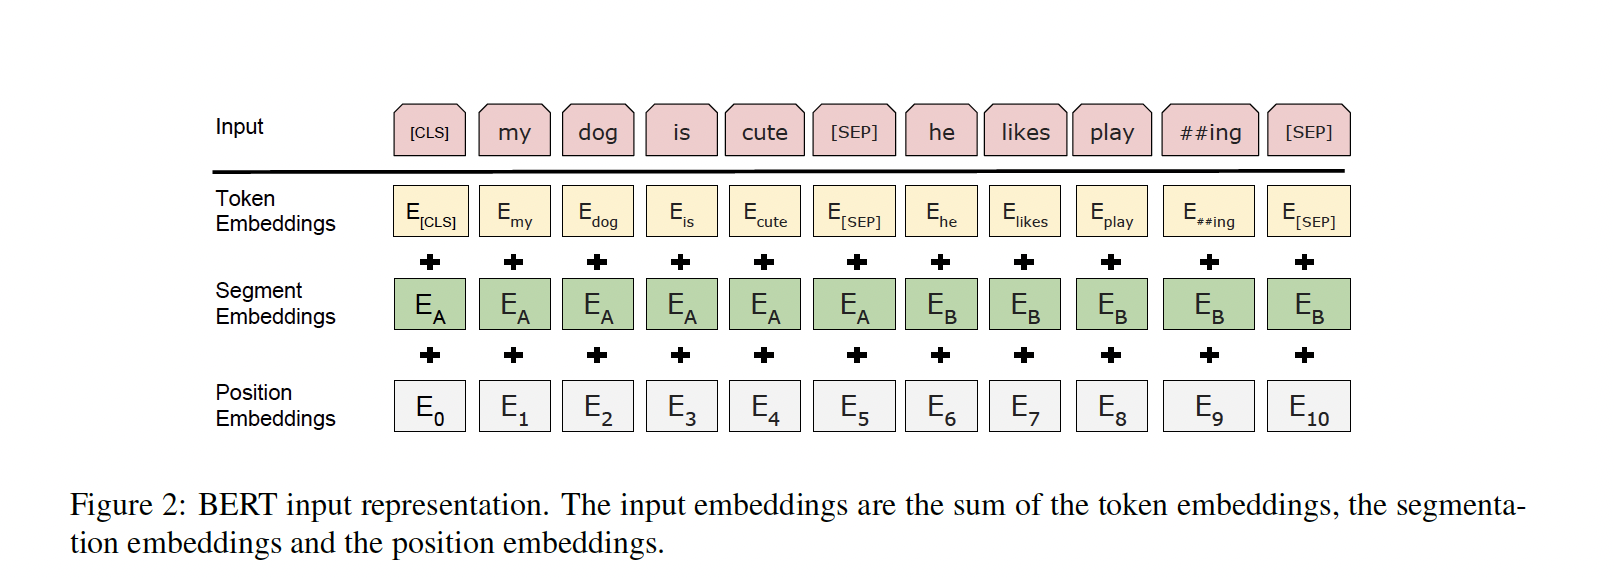

### 2. **SELF ATTENTION - Mathematical Explanation**

Let’s break down the process mathematically:

- Every word, including "condition," starts with a **basic token embedding**. In BERT, this is a vector, say 768-dimensional, representing the word's raw meaning in isolation.
    - Example: econdition=[0.5,−0.3,0.1,…,0.2]
        
        econdition=[0.5,−0.3,0.1,…,0.2]e_{\text{condition}} = [0.5, -0.3, 0.1, \dots, 0.2]
        
- When the sentence is processed by BERT, self-attention assigns **attention weights** based on how relevant other words are to "condition."

Let’s say that for sentence 1:

- "condition" attends strongly to "patient" (high weight: 0.9) and "critical" (weight: 0.8).

For sentence 2:

- "condition" attends strongly to "road" (weight: 0.85) and "poor" (weight: 0.8).

The self-attention mechanism uses these weights to create new **weighted representations** of the context for "condition." These context-specific embeddings are different in the two sentences because the words it's paying attention to are different.

## Comparison of BERT with State-of-the-Art Models


| **Model**                    | **Citation**                  | **Architecture**                                                   | **Key Characteristics**                                           | **Comparison to BERT**                                               |
|-------------------------------|-------------------------------|--------------------------------------------------------------------|--------------------------------------------------------------------|----------------------------------------------------------------------|
| **ELMo (Embeddings from Language Models)** | Peters et al. (2018)           | BiLSTM (Bidirectional LSTM)                                         | Contextual word embeddings from forward and backward LSTMs (shallow bidirectionality). | BERT’s fully bidirectional Transformer results in better performance on tasks requiring deep contextual understanding. |
| **OpenAI GPT (Generative Pre-trained Transformer)** | Radford et al. (2018)          | Transformer (Unidirectional, left-to-right)                         | Unidirectional language model; pretrained and fine-tuned for specific tasks. | BERT’s bidirectional training leads to better understanding of context and stronger performance across multiple tasks. |
| **Transformer**               | Vaswani et al. (2017)          | Transformer (Encoder-Decoder Architecture)                          | Powerful architecture for sequence transduction tasks like translation, but not pretrained. | BERT builds on the Transformer’s encoder, adding pretraining on large text corpora, leading to improved language understanding. |
| **BiLSTM + Attention**        | -                             | BiLSTM (Bidirectional LSTM) with Attention Mechanism                | Popular before Transformer-based models; sequential processing of text. | BERT’s Transformer architecture is faster and more efficient, leading to superior performance and scalability. |
| **InferSent**                 | Conneau et al. (2017)          | BiLSTM + Max Pooling                                                | Sentence embeddings trained on natural language inference (NLI) tasks. | BERT’s pretraining allows it to learn better contextual representations and outperform InferSent on NLI tasks like MultiNLI. |

### Benchmarks Where BERT Outperforms:
- **GLUE**: BERT achieved the highest score compared to models like GPT, ELMo, and InferSent.
- **SQuAD**: BERT set a new record on SQuAD v1.1 and v2.0 in comparison to other models, including GPT and BiLSTM-based models.
- **MultiNLI**: BERT outperformed models like InferSent and GPT, achieving state-of-the-art accuracy. 


Key Findings
Larger models led to consistent accuracy improvements across tasks, even for small-scale tasks with limited training data1.
BERT's bidirectional approach, while slower to converge, outperforms unidirectional training after a small number of pre-training steps5.
The pre-trained BERT model can be fine-tuned with just one additional output layer, reducing the need for task-specific architectures2.
BERT's conceptual simplicity and empirical power have made it a cornerstone in modern NLP, inspiring numerous subsequent models and applications.

## CODE IMPLEMENTATION

implementation to demonstrate the use of the MIMIC-IV dataset for a mortality prediction task using a BERT-based model. This implementation will use the Hugging Face datasets library and transformers for ease of use.

In [1]:
import pandas as pd
import numpy as np
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.preprocessing import MultiLabelBinarizer


/workspaces/MediAssist-Healthcare-Data-Solutions/.bertenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load the MIMIC-IV dataset
dataset = load_dataset("thbndi/Mimic4Dataset")

Using the latest cached version of the module from /home/codespace/.cache/huggingface/modules/datasets_modules/datasets/thbndi--Mimic4Dataset/451842056e2bb78b332303d9c5f8ea2f43eeac9941e96c2aa38c310475e206b7 (last modified on Thu Oct 24 16:31:17 2024) since it couldn't be found locally at thbndi/Mimic4Dataset, or remotely on the Hugging Face Hub.


ModuleNotFoundError: No module named 'git'

In [ ]:
# Prepare the data
def prepare_data(examples):
    # Assuming 'text' contains the clinical notes and 'icd_code' contains the ICD codes
    return {
        'text': examples['text'],
        'labels': examples['icd_code']
    }


In [ ]:
dataset = dataset.map(prepare_data)

In [ ]:
# Split the dataset
train_val = dataset['train'].train_test_split(test_size=0.2)
train_dataset = train_val['train']
val_dataset = train_val['test']
test_dataset = dataset['test']


In [ ]:

# Get unique ICD codes
all_codes = set()
for split in dataset.values():
    all_codes.update([code for codes in split['labels'] for code in codes])

In [ ]:

# Create a MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb.fit([list(all_codes)])

In [ ]:
# Number of unique ICD codes
num_labels = len(mlb.classes_)

In [ ]:
# Load the tokenizer and model
model_name = "emilyalsentzer/Bio_ClinicalBERT"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)

In [ ]:
# Tokenize and encode labels
def tokenize_and_encode(examples):
    tokenized = tokenizer(examples["text"], padding="max_length", truncation=True, max_length=512)
    tokenized['labels'] = mlb.transform(examples['labels']).tolist()
    return tokenized

In [ ]:

tokenized_train = train_dataset.map(tokenize_and_encode, batched=True)
tokenized_val = val_dataset.map(tokenize_and_encode, batched=True)
tokenized_test = test_dataset.map(tokenize_and_encode, batched=True)

In [4]:



# Define compute metrics function
def compute_metrics(pred):
    labels = pred.label_ids
    preds = (pred.predictions > 0).astype(int)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='micro')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Set up training arguments
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    compute_metrics=compute_metrics,
)

# Train the model
trainer.train()

# Evaluate on the test set
test_results = trainer.evaluate(tokenized_test)

print(f"Test results: {test_results}")

# Function to predict ICD codes for new text
def predict_icd_codes(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    outputs = model(**inputs)
    predictions = (outputs.logits > 0).int().squeeze().tolist()
    predicted_codes = mlb.inverse_transform([predictions])[0]
    return predicted_codes

# Example usage
sample_note = "Patient presented with chest pain and shortness of breath."
predicted_codes = predict_icd_codes(sample_note)
print(f"Predicted ICD codes: {predicted_codes}")

NameError: name 'load_dataset' is not defined